For this test I will take out the 'fare' column.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path = 'http://classes.cs.uoregon.edu/18F/cis199ids/data/'
file = path + 'titanic_all.csv'
ship = pd.read_csv(file)

In [3]:
ship.sample(n=10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
950,3,0,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S,NaN,NaN,NaN
688,3,0,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S,NaN,NaN,"Bridgerule, Devon"
345,2,0,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,NaN,NaN,"St Ives, Cornwall / Calumet, MI"
375,2,0,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,NaN,NaN,"Helsinki, Finland Ashtabula, Ohio"
1177,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
669,3,0,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S,NaN,NaN,England
34,1,0,"Borebank, Mr. John James",male,42.0,0,0,110489,26.5500,D22,S,NaN,NaN,"London / Winnipeg, MB"
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"
445,2,0,"Hiltunen, Miss. Marta",female,18.0,1,1,250650,13.0000,NaN,S,NaN,NaN,"Kontiolahti, Finland / Detroit, MI"
743,3,0,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,NaN,NaN,"Norrlot, Sweden Chicago, IL"


In [4]:
ship = ship.drop(['name', 'fare', 'ticket', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [5]:
ship['sex'].replace(('male', 'female'), (0, 1), inplace=True)
ship['age'] = ship['age'].fillna(ship['age'].median())
ship.sample(n=10)

,pclass,survived,sex,age,sibsp,parch
961,3,0,1,28.0,1,0
837,3,0,0,37.0,2,0
69,1,1,1,28.0,0,1
847,3,0,0,23.5,0,0
331,2,0,0,18.0,0,0
968,3,0,0,36.0,1,0
1083,3,0,0,28.0,0,0
966,3,0,1,25.0,0,0
866,3,1,1,2.0,0,1
517,2,0,0,26.0,0,0


Now I can split the data into features (X) and targets (y). The targets will be whether or not the passenger survived, and the features will be all of the other columns.

In [6]:
X_ship = ship.drop('survived', axis=1)

In [7]:
y_ship = ship['survived']

Now I can split the features and targets into train and test data using the Naive Bayes' model to make predictions.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_ship, y_ship, test_size=0.30, random_state=199)

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
model = GaussianNB( )

In [12]:
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [13]:
y_predictions = model.predict(X_test)

Lastly, I will check the accuracy of our predictions

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predictions)

0.7608142493638677

We got a higher accuracy score of 76%!

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier(max_leaf_nodes=2,
                               max_depth=3,
                               min_samples_leaf=15,
                               criterion='gini',
                               splitter='random',
                               random_state=199)

model.fit(X_train, y_train);

y_predictions = model.predict(X_test)

accuracy_score(y_test, y_predictions)

0.7633587786259542

Just like the previous test, it seems as if the fewer amount of nodes I have, the higher my accuracy score is. The best I got was when max_leaf_nodes=2,
             max_depth=3,
             min_samples_leaf=15,

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rf2 = RandomForestRegressor(n_estimators=300,
                           max_depth=3,
                           max_features=4,
                           random_state=199)
rf2.fit(X_train, y_train);

predictions = rf2.predict(X_test)
accuracy_score(y_test, predictions.round())

0.7989821882951654

Text(92.68,0.5,'predicted label')

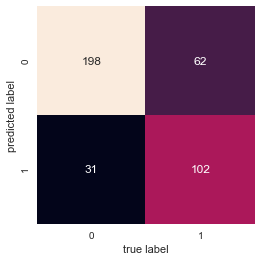

In [19]:
sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predictions)
#mat.T creates the transpose of the matrix mat
#fmt='d' format for (int) 'digits'
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')